# Фаза 2 • Неделя 8 • Четверг
## Нейронные сети
### 🔥 PyTorch: fine tuning

In [2]:
!pip -qq install torchutils

In [59]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms as T
import time
from PIL import Image
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix

from torchvision import io # input/output
import torchutils as tu
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [5]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


### Подготовка к работе

1. Загрузи этот ноутбук на Google Colab
2. Подгрузи архив [датасета](https://www.kaggle.com/datasets/ikobzev/architectural-heritage-elements-image64-dataset) в свое пространство и разархивируй его с помощью `unzip`.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import zipfile

# Путь к архиву на Google Диске
zip_path = '/content/drive/My Drive/archive(6).zip'

# Распаковка архива
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')

In [7]:
# from google.colab import drive
# drive.mount('archive(6).zip')

KeyboardInterrupt: 

In [ ]:
# !unzip /archive(6).zip -d /content

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/train/dome(outer)/1294.jpg  
  inflating: /content/train/dome(outer)/1295.jpg  
  inflating: /content/train/dome(outer)/1296.jpg  
  inflating: /content/train/dome(outer)/1297.jpg  
  inflating: /content/train/dome(outer)/1298.jpg  
  inflating: /content/train/dome(outer)/1299.jpg  
  inflating: /content/train/dome(outer)/1300.jpg  
  inflating: /content/train/dome(outer)/1301.jpg  
  inflating: /content/train/dome(outer)/1302.jpg  
  inflating: /content/train/dome(outer)/1303.jpg  
  inflating: /content/train/dome(outer)/1304.jpg  
  inflating: /content/train/dome(outer)/1305.jpg  
  inflating: /content/train/dome(outer)/1306.jpg  
  inflating: /content/train/dome(outer)/1307.jpg  
  inflating: /content/train/dome(outer)/1308.jpg  
  inflating: /content/train/dome(outer)/1309.jpg  
  inflating: /content/train/dome(outer)/1310.jpg  
  inflating: /content/train/dome(outer)/1311.jpg  
  inflating: /

In [2]:
mean = np.array([0.4713, 0.4699, 0.4549])
std = np.array([0.2801, 0.2687, 0.2749])

trnsfrms = T.Compose(
    [
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=mean, std=std)
    ]
)

trnsfrm_train = T.Compose([
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(mean=mean, std=std)
])

NameError: name 'np' is not defined

In [16]:
train_dataset = torchvision.datasets.ImageFolder(
    '/content/extracted_files/train',
    transform=trnsfrm_train
)
valid_dataset = torchvision.datasets.ImageFolder(
    '/content/extracted_files/valid',
    transform=trnsfrms
)
test_dataset = torchvision.datasets.ImageFolder(
    '/content/extracted_files/test',
    transform=trnsfrms
)

In [14]:
# dataset = datasets.ImageFolder(
#     root='/content/extracted_files/train',
#     transform=T.ToTensor()
# )
# loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

# mean = torch.zeros(3)  # Для RGB каналов
# std = torch.zeros(3)

# print("Вычисление mean и std...")
# for images, _ in loader:
#     # Рассчитываем среднее значение и стандартное отклонение по всем каналам
#     mean += images.mean([0, 2, 3])
#     std += images.std([0, 2, 3])

# mean /= len(loader)
# std /= len(loader)

# print(f"Mean: {mean}")
# print(f"Std: {std}")

Вычисление mean и std...


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Mean: tensor([0.4713, 0.4699, 0.4549])
Std: tensor([0.2801, 0.2687, 0.2749])


In [17]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 13492
    Root location: /content/extracted_files/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.4713 0.4699 0.4549], std=[0.2801 0.2687 0.2749])
           )

In [20]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/extracted_files/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.4713 0.4699 0.4549], std=[0.2801 0.2687 0.2749])
           )

In [19]:
valid_dataset

Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/extracted_files/valid
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.4713 0.4699 0.4549], std=[0.2801 0.2687 0.2749])
           )

1. Убедись, что структура папок соответствует задаче классификации (либо приведите ее к формату, указанному ниже):

        `train`
        
            - class_1
            - class_2
            - ...
            - class_n
            
        `valid`

            - class_1
            - class_2
            - ...
            - class_n

In [21]:
train_dataset.class_to_idx

{'air hockey': 0,
 'ampute football': 1,
 'archery': 2,
 'arm wrestling': 3,
 'axe throwing': 4,
 'balance beam': 5,
 'barell racing': 6,
 'baseball': 7,
 'basketball': 8,
 'baton twirling': 9,
 'bike polo': 10,
 'billiards': 11,
 'bmx': 12,
 'bobsled': 13,
 'bowling': 14,
 'boxing': 15,
 'bull riding': 16,
 'bungee jumping': 17,
 'canoe slamon': 18,
 'cheerleading': 19,
 'chuckwagon racing': 20,
 'cricket': 21,
 'croquet': 22,
 'curling': 23,
 'disc golf': 24,
 'fencing': 25,
 'field hockey': 26,
 'figure skating men': 27,
 'figure skating pairs': 28,
 'figure skating women': 29,
 'fly fishing': 30,
 'football': 31,
 'formula 1 racing': 32,
 'frisbee': 33,
 'gaga': 34,
 'giant slalom': 35,
 'golf': 36,
 'hammer throw': 37,
 'hang gliding': 38,
 'harness racing': 39,
 'high jump': 40,
 'hockey': 41,
 'horse jumping': 42,
 'horse racing': 43,
 'horseshoe pitching': 44,
 'hurdles': 45,
 'hydroplane racing': 46,
 'ice climbing': 47,
 'ice yachting': 48,
 'jai alai': 49,
 'javelin': 50,
 '

In [24]:
train_dataset.class_to_idx == test_dataset.class_to_idx

True

In [23]:
train_dataset.class_to_idx == valid_dataset.class_to_idx

True

2. Создай `DataLoader` в для обучающей и валидационных выборок. Примените аугментации к изображениям.

In [25]:
BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, shuffle=True, drop_last=True, batch_size=BATCH_SIZE)
valid_loader = DataLoader(valid_dataset, shuffle=False, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=BATCH_SIZE)

3. Создай экземпляр предобученной модели: [torchvision models](https://pytorch.org/vision/stable/models.html). Можно взять любую модель для baseline, а дальше попробовать что-то более сложное.

In [26]:
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights=ResNet18_Weights.DEFAULT).to(DEVICE)

fake_batch = torch.randn(4, 3, 224, 224, device=DEVICE)
tu.get_model_summary(model, fake_batch)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


Layer                                       Kernel             Output          Params           FLOPs
0_conv1                                   [3, 64, 7, 7]   [4, 64, 112, 112]       9,408   472,055,808
1_bn1                                              [64]   [4, 64, 112, 112]         128    12,845,056
2_relu                                                -   [4, 64, 112, 112]           0             0
3_maxpool                                             -     [4, 64, 56, 56]           0             0
4_layer1.0.Conv2d_conv1                  [64, 64, 3, 3]     [4, 64, 56, 56]      36,864   462,422,016
5_layer1.0.BatchNorm2d_bn1                         [64]     [4, 64, 56, 56]         128     3,211,264
6_layer1.0.ReLU_relu                                  -     [4, 64, 56, 56]           0             0
7_layer1.0.Conv2d_conv2                  [64, 64, 3, 3]     [4, 64, 56, 56]      36,864   462,422,016
8_layer1.0.BatchNorm2d_bn2                         [64]     [4, 64, 56, 56]       

In [27]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

5. Замени выходной слой форматом, который подходит под задачу: бинарная или многоклассовая классификация.

In [28]:
class MyResNet(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.model = resnet18(weights=ResNet18_Weights.DEFAULT)
    self.model.fc = nn.Linear(in_features=512, out_features=100)

    for param in self.model.parameters():
      param.requires_grad = False
    self.model.fc.weight.requires_grad = True
    self.model.fc.bias.requires_grad = True

  def forward(self, x):
    return self.model(x)

model = MyResNet()
model.to(DEVICE);

6. Обучи модель (только последний слой!) и зафиксируй метрику на валидационной части выборки.

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
criterion = torch.nn.CrossEntropyLoss()

In [30]:
train_epoch_acc = []
train_epoch_losses = []
valid_epoch_losses = []
valid_epoch_acc =[]
for epoch in range(10):
    model.train()
    loss_batch = []
    acc_batch  = []

    for images, labels in train_loader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)

        preds = model(images).squeeze(-1)
        loss = criterion(preds, labels)
        loss_batch.append(loss.item())
        accuracy = (preds.argmax(dim=1) == labels).cpu().numpy().mean()
        acc_batch.append(accuracy)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_epoch_losses.append(np.mean(loss_batch))
    train_epoch_acc.append(np.mean(acc_batch))

    model.eval()
    loss_batch = []
    acc_batch  = []
    for images, labels in valid_loader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        with torch.no_grad():
            preds = model(images).squeeze(-1)

        loss = criterion(preds, labels)
        loss_batch.append(loss.item())

        accuracy = (preds.argmax(dim=1) == labels).cpu().numpy().mean()
        acc_batch.append(accuracy)

    valid_epoch_losses.append(np.mean(loss_batch))
    valid_epoch_acc.append(np.mean(acc_batch))

    print(f'Epoch: {epoch}  loss_train: {train_epoch_losses[-1]:.3f}, loss_valid: {valid_epoch_losses[-1]:.3f}')
    print(f'\t  metrics_train: {train_epoch_acc[-1]:.3f}, metrics_valid: {valid_epoch_acc[-1]:.3f}')

Epoch: 0  loss_train: 3.112, loss_valid: 1.670
	  metrics_train: 0.353, metrics_valid: 0.662
Epoch: 1  loss_train: 1.589, loss_valid: 1.000
	  metrics_train: 0.663, metrics_valid: 0.771
Epoch: 2  loss_train: 1.237, loss_valid: 0.784
	  metrics_train: 0.716, metrics_valid: 0.815
Epoch: 3  loss_train: 1.053, loss_valid: 0.703
	  metrics_train: 0.750, metrics_valid: 0.820
Epoch: 4  loss_train: 0.948, loss_valid: 0.595
	  metrics_train: 0.768, metrics_valid: 0.853
Epoch: 5  loss_train: 0.882, loss_valid: 0.570
	  metrics_train: 0.778, metrics_valid: 0.845
Epoch: 6  loss_train: 0.847, loss_valid: 0.528
	  metrics_train: 0.780, metrics_valid: 0.855
Epoch: 7  loss_train: 0.818, loss_valid: 0.507
	  metrics_train: 0.789, metrics_valid: 0.873
Epoch: 8  loss_train: 0.771, loss_valid: 0.507
	  metrics_train: 0.798, metrics_valid: 0.861
Epoch: 9  loss_train: 0.753, loss_valid: 0.488
	  metrics_train: 0.801, metrics_valid: 0.855


7. Распечатай изображение из тестовой выборки и подпиши класс картинки, предсказанный моделью.

In [1]:
idx2class= {j: i for i, j in train_dataset.class_to_idx.items()}
idx2class

NameError: name 'train_dataset' is not defined

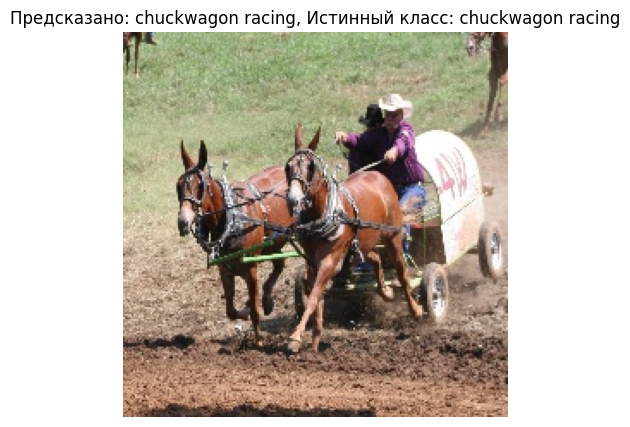

In [32]:
random_idx = np.random.randint(0, len(valid_loader.dataset) - 1)

image, label = valid_loader.dataset[random_idx]

image = image.to(DEVICE)

#model.eval()
with torch.no_grad():
    output = model(image.unsqueeze(0))
    predicted_class = output.argmax(dim=1).item()

image = image.cpu()
image = image * std[:, None, None] + mean[:, None, None]
image = image.numpy().transpose((1, 2, 0))
image = image.clip(0, 1)

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title(f"Предсказано: {idx2class[predicted_class]}, Истинный класс: {idx2class[label]}")
plt.axis('off')
plt.show()


8. "Разморозь" несоклько слоев базовой модели и вновь обучи ее. Зафиксируй метрику качества для модели. О том, как сделать unfreeze нескольких слоев сразу, а не только последнего, можно почитать тут: [discuss.pytorch.org](https://discuss.pytorch.org/t/how-the-pytorch-freeze-network-in-some-layers-only-the-rest-of-the-training/7088/3)

In [36]:
class MyFreezeResNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.model = resnet18(weights=ResNet18_Weights.DEFAULT)
        self.model.fc = nn.Linear(in_features=512, out_features=100)

        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.fc.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.model(x)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyFreezeResNet()
model.to(DEVICE)

MyFreezeResNet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [39]:
def plot_history(history, grid=True):
    fig, ax = plt.subplots(1,2, figsize=(14,5))

    ax[0].plot(history['train_losses'], label='train loss')
    ax[0].plot(history['valid_losses'], label='valid loss')
    ax[0].set_title(f'Loss on epoch {len(history["train_losses"])}')
    ax[0].grid(grid)
    ax[0].set_ylim((0, max(history['train_losses'] + history['valid_losses']) + .1))
    ax[0].legend()

    ax[1].plot(history['train_accs'], label='train acc')
    ax[1].plot(history['valid_accs'], label='valid acc')
    ax[1].set_title(f'Accuracy on epoch {len(history["train_losses"])}')
    ax[1].grid(grid)
    ax[1].set_ylim((0, 1))
    ax[1].legend()

    plt.show()

In [56]:
def fit_model(
        model: nn.Module,
        epochs: int,
        optimizer: torch.optim.Optimizer,
        history = None
        ) -> dict:
    '''
    model: pytorch model - model to train
    epochs: int          - number of epochs
    '''

    # будем сохранять значения точности и лосса в history
    history = history or {
        'train_accs': [],
        'train_losses': [],
        'valid_accs': [],
        'valid_losses': [],
    }

    # Начало отсчета времени
    start_time = time.time()

    # определяем текущую эпоху обучения
    start_epoch = len(history['train_accs'])
    for epoch in range(start_epoch+1, start_epoch+epochs+1):
        print(f'{"-"*13} Epoch {epoch} {"-"*13}')

        model.train()
        batch_accs = []
        batch_losses = []
        for samples, labels in train_loader:

            samples = samples.to(DEVICE)
            labels = labels.to(DEVICE)

            y_pred = model(samples)

            # Считаем лосс: передаем в функцию потерь предсказания и
            # настоящие метки классов
            loss = criterion(y_pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())

            batch_accs.append((y_pred.argmax(axis=1) == labels).cpu().numpy().mean())

        history['train_losses'].append(np.mean(batch_losses))
        history['train_accs'].append(np.mean(batch_accs))

        # Validation
        model.eval()

        batch_accs = []
        batch_losses = []
        for samples, labels in valid_loader:
            with torch.no_grad():
                y_pred = model(samples.to(DEVICE))
            loss = criterion(y_pred, labels.to(DEVICE))
            batch_losses.append(loss.item())
            batch_accs.append((y_pred.cpu().argmax(axis=1) == labels.cpu()).numpy().mean())
        history['valid_accs'].append(np.mean(batch_accs))
        history['valid_losses'].append(np.mean(batch_losses))

        # печатаем результат
        print(
            f'train: accuracy {history["train_accs"][-1]:.4f}, loss {history["train_losses"][-1]:.4f}\n'
            f'valid: accuracy {history["valid_accs"][-1]:.4f}, loss {history["valid_losses"][-1]:.4f}'
        )
        print(f'{"-"*35}')
        print()

    # Конец отсчета времени
    end_time = time.time()

    # Выводим общее время, затраченное на обучение
    total_time = end_time - start_time
    hours = total_time // 3600
    minutes = (total_time % 3600) // 60
    seconds = total_time % 60

    print(f"Total training time: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

    # Печатаем графики
    plot_history(history)

    return history

------------- Epoch 1 -------------
train: accuracy 0.7858, loss 0.8070
valid: accuracy 0.8436, loss 0.5167
-----------------------------------

------------- Epoch 2 -------------
train: accuracy 0.7967, loss 0.7699
valid: accuracy 0.8594, loss 0.4997
-----------------------------------

------------- Epoch 3 -------------
train: accuracy 0.8048, loss 0.7291
valid: accuracy 0.8674, loss 0.4633
-----------------------------------

------------- Epoch 4 -------------
train: accuracy 0.8106, loss 0.7120
valid: accuracy 0.8632, loss 0.4493
-----------------------------------

------------- Epoch 5 -------------
train: accuracy 0.8188, loss 0.6796
valid: accuracy 0.8611, loss 0.4418
-----------------------------------

------------- Epoch 6 -------------
train: accuracy 0.8160, loss 0.6735
valid: accuracy 0.8635, loss 0.4611
-----------------------------------

------------- Epoch 7 -------------
train: accuracy 0.8190, loss 0.6611
valid: accuracy 0.8775, loss 0.4265
----------------------

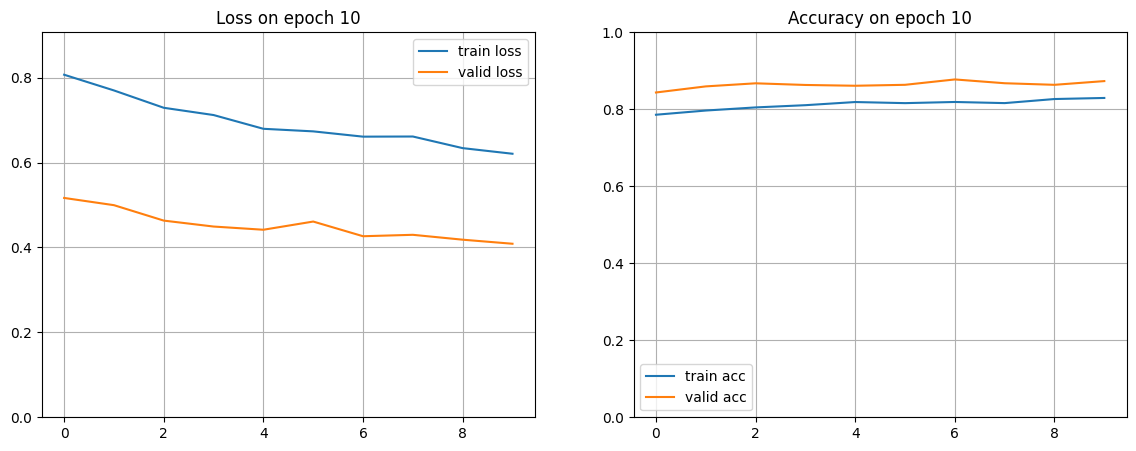

In [57]:
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.002)
criterion = torch.nn.CrossEntropyLoss()
logs = fit_model(model, 10, optimizer)

F1 Score: 0.8708


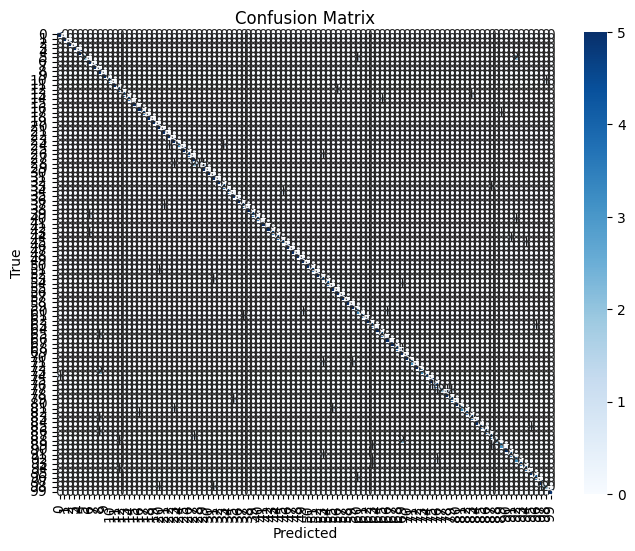

In [60]:
def evaluate_model(model, dataloader, device, class_names):
    """
    Оценка модели по метрикам F1 и Confusion Matrix.

    Args:
        model (torch.nn.Module): Обученная модель.
        dataloader (torch.utils.data.DataLoader): Загрузчик данных (train_loader/valid_loader).
        device (torch.device): Устройство, на котором работает модель (CPU или GPU).
        class_names (list): Список классов.

    Returns:
        None
    """
    model.eval()

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Прогнозируем
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Вычисляем F1 метрику
    f1 = f1_score(all_labels, all_preds, average='weighted')  # Можно выбрать average='macro' или 'micro'
    print(f"F1 Score: {f1:.4f}")

    # Строим confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Визуализация confusion matrix как heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Пример использования:
# Предполагается, что у вас есть `train_loader` или `valid_loader` для загрузки данных и `class_names` (список классов)

evaluate_model(model, valid_loader, DEVICE, idx2class)

In [37]:
# optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.002)

# criterion = torch.nn.CrossEntropyLoss()

# train_epoch_acc = []
# train_epoch_losses = []
# valid_epoch_losses = []
# valid_epoch_acc = []

# for epoch in range(8):
#     model.train()
#     loss_batch = []
#     acc_batch  = []

#     for images, labels in train_loader:
#         images = images.to(DEVICE)
#         labels = labels.to(DEVICE)

#         preds = model(images).squeeze(-1)
#         loss = criterion(preds, labels)
#         loss_batch.append(loss.item())
#         accuracy = (preds.argmax(dim=1) == labels).cpu().numpy().mean()
#         acc_batch.append(accuracy)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     train_epoch_losses.append(np.mean(loss_batch))
#     train_epoch_acc.append(np.mean(acc_batch))

#     model.eval()
#     loss_batch = []
#     acc_batch  = []
#     for images, labels in valid_loader:
#         images = images.to(DEVICE)
#         labels = labels.to(DEVICE)
#         with torch.no_grad():
#             preds = model(images).squeeze(-1)

#         loss = criterion(preds, labels)
#         loss_batch.append(loss.item())

#         accuracy = (preds.argmax(dim=1) == labels).cpu().numpy().mean()
#         acc_batch.append(accuracy)

#     valid_epoch_losses.append(np.mean(loss_batch))
#     valid_epoch_acc.append(np.mean(acc_batch))

#     print(f'Epoch: {epoch}  loss_train: {train_epoch_losses[-1]:.3f}, loss_valid: {valid_epoch_losses[-1]:.3f}')
#     print(f'\t  metrics_train: {train_epoch_acc[-1]:.3f}, metrics_valid: {valid_epoch_acc[-1]:.3f}')

Epoch: 0  loss_train: 3.125, loss_valid: 1.682
	  metrics_train: 0.349, metrics_valid: 0.661
Epoch: 1  loss_train: 1.607, loss_valid: 1.017
	  metrics_train: 0.666, metrics_valid: 0.769
Epoch: 2  loss_train: 1.233, loss_valid: 0.811
	  metrics_train: 0.723, metrics_valid: 0.795
Epoch: 3  loss_train: 1.074, loss_valid: 0.652
	  metrics_train: 0.746, metrics_valid: 0.841
Epoch: 4  loss_train: 0.958, loss_valid: 0.627
	  metrics_train: 0.767, metrics_valid: 0.830
Epoch: 5  loss_train: 0.891, loss_valid: 0.580
	  metrics_train: 0.776, metrics_valid: 0.841
Epoch: 6  loss_train: 0.852, loss_valid: 0.550
	  metrics_train: 0.786, metrics_valid: 0.841
Epoch: 7  loss_train: 0.814, loss_valid: 0.532
	  metrics_train: 0.792, metrics_valid: 0.861


9. Сравни качество двух моделей: предобученной с замененным выходным слоем и дообученной с несколькими размороженными слоями.

Добучив слой layer4 мы получили 7% повышения точности предсказания

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__ и распечатай результат команды `!git status` в ячейке ниже.

10. Сохрани модель (пример можно посмотреть [тут](../../learning/aux/model_saving.ipynb) или в [документации](https://pytorch.org/tutorials/beginner/saving_loading_models.html))

In [61]:
torch.save(model.state_dict(), 'my_freeze_resnet18.pth')

11. Реализуй функцию, которая на вход принимает путь к файлу, а в ответ возвращает класс объекта.

In [51]:
def predict_image_class(model, pred_file_path, class_names, device):
    """
    Делает предсказание для изображения и возвращает класс объекта и время предсказания.

    Args:
        model (torch.nn.Module): Обученная модель.
        file_path (str): Путь к изображению.
        class_names (list): Список названий классов.
        device (torch.device): Устройство, на котором работает модель (CPU или GPU).

    Returns:
        tuple: Название класса и время предсказания.
    """
    # Подготовка изображения
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=mean, std=std),
    ])

    try:
        # Загружаем изображение
        image = Image.open(pred_file_path).convert("RGB")
        image_tensor = transform(image).unsqueeze(0).to(device)
    except Exception as e:
        raise ValueError(f"Ошибка при загрузке изображения: {e}")

    # Перевод модели в режим оценки
    model.eval()

    with torch.inference_mode():
        # Засекаем время предсказания
        start_time = time.time()

        # Предсказание
        outputs = model(image_tensor)
        _, predicted_class_idx = outputs.max(1)
        predicted_class = class_names[predicted_class_idx.item()]

        # Вычисляем время выполнения
        elapsed_time = time.time() - start_time

            # Отображение изображения с предсказанным классом
    plt.imshow(image)
    plt.title(f"Предсказанный класс: {predicted_class}\nВремя предсказания: {elapsed_time:.4f} секунд")
    plt.axis("off")
    plt.show()


    return predicted_class, elapsed_time

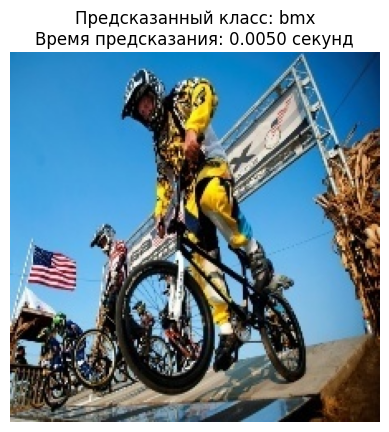

Класс: bmx, Время предсказания: 0.0050 секунд


In [54]:
pred_file_path = "/content/extracted_files/test/bmx/4.jpg"
predicted_class, elapsed_time = predict_image_class(model, pred_file_path, idx2class, DEVICE)

print(f"Класс: {predicted_class}, Время предсказания: {elapsed_time:.4f} секунд")


12. Сохрани ноутбук на github